In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('/content/delhiaqi.csv', parse_dates=['date'])
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [5]:
# Fill missing with interpolation or drop
df.interpolate(method='time', inplace=True)
df.dropna(inplace=True)

NotImplementedError: 

In [6]:
# 3. Add AQI estimation (simplified) or just analyze pollutants
# For example, calculate an approximate AQI based on PM2.5 and PM10 (simplified)
# You can improve this with proper AQI breakpoints and formula from CPCB.

def simple_aqi(pm2_5, pm10):
    # This is a rough approximation: max of normalized PM2.5 and PM10
    # Normalize by daily standards (NAAQS India): PM2.5 = 60 μg/m3, PM10 = 100 μg/m3
    aqi_pm2_5 = (pm2_5 / 60) * 100
    aqi_pm10 = (pm10 / 100) * 100
    return max(aqi_pm2_5, aqi_pm10)

df['AQI_approx'] = df.apply(lambda x: simple_aqi(x['pm2_5'], x['pm10']), axis=1)

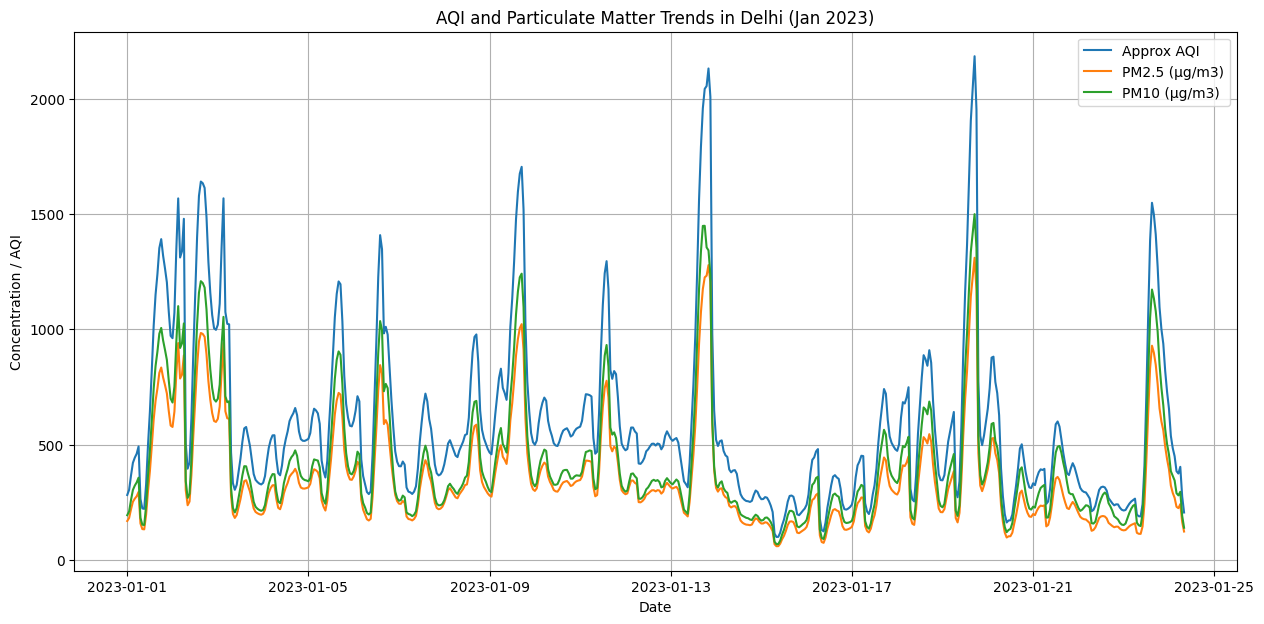

In [7]:
# 4. Time series plot of AQI and key pollutants
plt.figure(figsize=(15,7))
plt.plot(df['date'], df['AQI_approx'], label='Approx AQI')
plt.plot(df['date'], df['pm2_5'], label='PM2.5 (μg/m3)')
plt.plot(df['date'], df['pm10'], label='PM10 (μg/m3)')
plt.title('AQI and Particulate Matter Trends in Delhi (Jan 2023)')
plt.xlabel('Date')
plt.ylabel('Concentration / AQI')
plt.legend()
plt.grid()
plt.show()

/tmp/ipython-input-8-2761547356.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.set_index('date').asfreq('H')


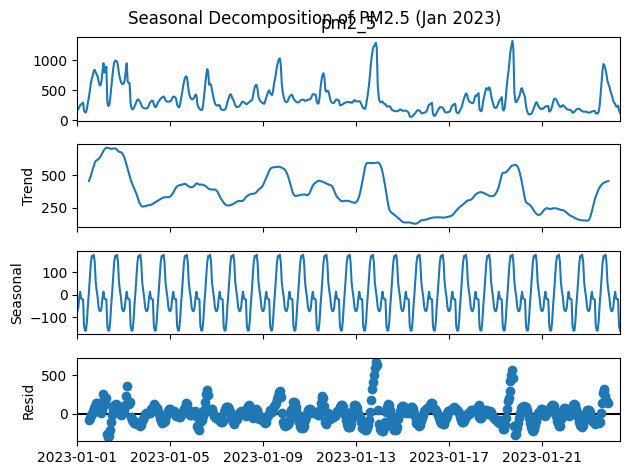

In [8]:
# 5. Seasonal decomposition of PM2.5 (hourly data)
# First ensure data is hourly and indexed by date
df_hourly = df.set_index('date').asfreq('H')
result = seasonal_decompose(df_hourly['pm2_5'], model='additive')
result.plot()
plt.suptitle('Seasonal Decomposition of PM2.5 (Jan 2023)')
plt.show()


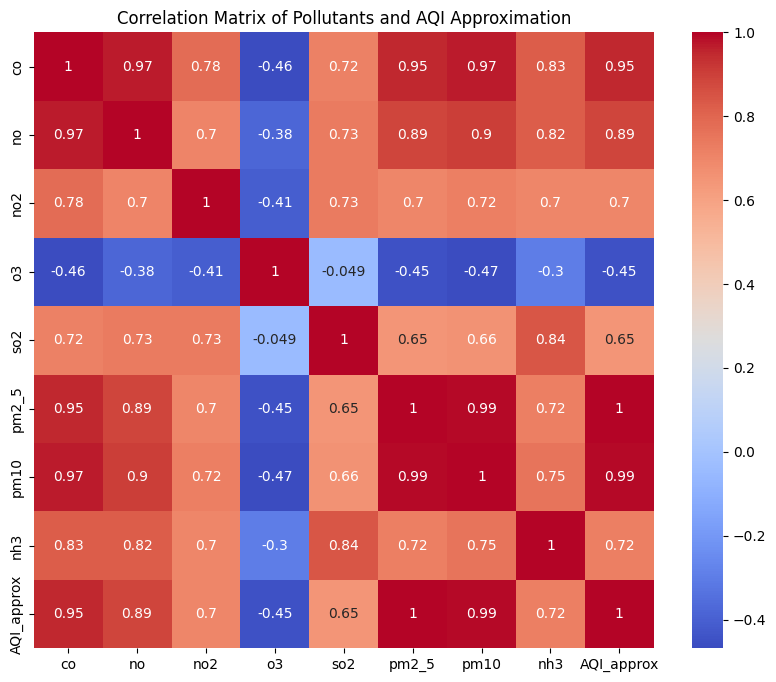

In [9]:
# 6. Correlation matrix between pollutants
plt.figure(figsize=(10,8))
corr = df[['co','no','no2','o3','so2','pm2_5','pm10','nh3','AQI_approx']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants and AQI Approximation')
plt.show()

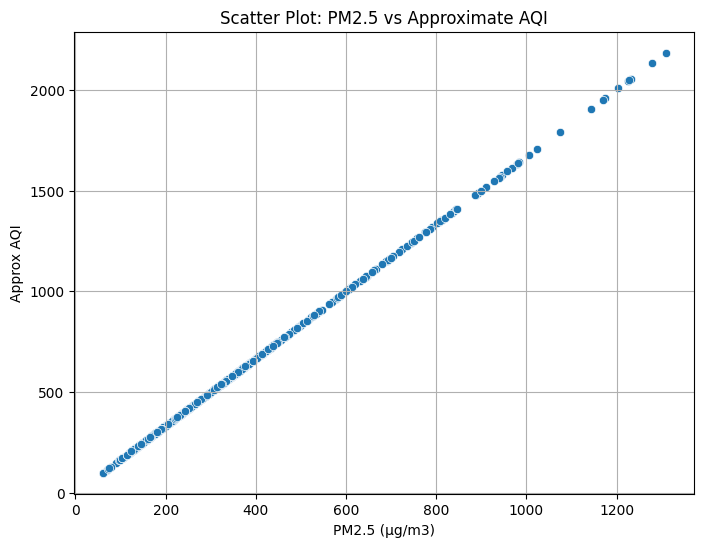

In [10]:
# 7. Scatter plot between PM2.5 and AQI approximation
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pm2_5', y='AQI_approx')
plt.title('Scatter Plot: PM2.5 vs Approximate AQI')
plt.xlabel('PM2.5 (μg/m3)')
plt.ylabel('Approx AQI')
plt.grid()
plt.show()


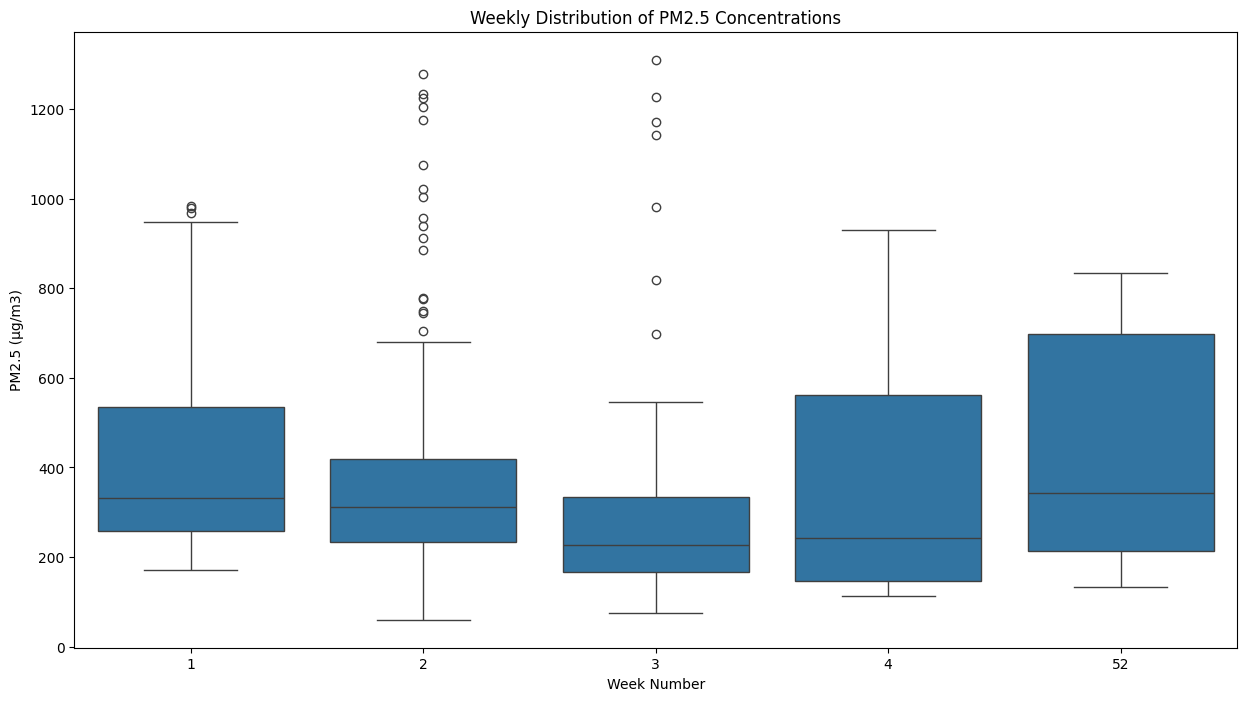

In [11]:
# 8. Boxplot of key pollutants by week (to observe seasonal/weekly variation)
df['week'] = df['date'].dt.isocalendar().week
plt.figure(figsize=(15,8))
sns.boxplot(x='week', y='pm2_5', data=df)
plt.title('Weekly Distribution of PM2.5 Concentrations')
plt.xlabel('Week Number')
plt.ylabel('PM2.5 (μg/m3)')
plt.show()

In [12]:
# 9. Summary statistics
print("Summary statistics of pollutants:")
print(df.describe())

Summary statistics of pollutants:
                      date            co          no         no2          o3  \
count                  561    561.000000  561.000000  561.000000  561.000000   
mean   2023-01-12 16:00:00   3814.942210   51.181979   75.292496   30.141943   
min    2023-01-01 00:00:00    654.220000    0.000000   13.370000    0.000000   
25%    2023-01-06 20:00:00   1708.980000    3.380000   44.550000    0.070000   
50%    2023-01-12 16:00:00   2590.180000   13.300000   63.750000   11.800000   
75%    2023-01-18 12:00:00   4432.680000   59.010000   97.330000   47.210000   
max    2023-01-24 08:00:00  16876.220000  425.580000  263.210000  164.510000   
std                    NaN   3227.744681   83.904476   42.473791   39.979405   

              so2        pm2_5         pm10         nh3   AQI_approx  \
count  561.000000   561.000000   561.000000  561.000000   561.000000   
mean    64.655936   358.256364   420.988414   26.425062   597.093939   
min      5.250000    60.10000